# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python course - AIML/foodhub_order.csv')
# returns the first 5 rows
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [5]:
#Making a copy of the original dataframe

df_original = df.copy()
df_original.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
df.shape


(1898, 9)

#### Observations:

- No of rows in the dataset - 1898
- No of columns in the dataset - 9


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [75]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   int64  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   comp_profit            1898 non-null   float64
 10  total_time             1898 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 163.2+ KB


#### Observations:
- 4 columns(restaurant_name,cuisine_type, day_of_the_week,rating) have string data type
- 4 columns(order_id,customer_id,food_preparation_time,delivery_time) have integer data type
- One column(cost_of_the_order ) have float data type


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

**Analysing all the columns for any missing values**

In [8]:
df_original['cuisine_type'].unique()
df_original['day_of_the_week'].unique()
df_original['delivery_time'].unique()
df_original['restaurant_name'].unique()
df_original['food_preparation_time'].unique()
df_original['customer_id'].unique()
df_original['order_id'].unique()
df_original['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

**Analysing the rating column**

In [9]:
#Rating column have 'Not given' as rating for some of the rows, so checking all the unique values in the rating column

df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [10]:
#Replace 'Not Given'' in rating column with nan in order to treat the missing values
df['rating']=df['rating'].replace(['Not given'],np.nan)
df['rating'].unique()

array([nan, '5', '3', '4'], dtype=object)

In [11]:
#Rating column is suppose to be numeric so converting its  data type
df['rating']=df['rating'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [12]:
#Checking for the no of null values in all the columns in the dataset
df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

In [13]:
(df_original['rating']=='Not given').value_counts(normalize=True)


False    0.612223
True     0.387777
Name: rating, dtype: float64

**Observation**
Yes, there are 736 missing values in the rating column in the given data set


**Trying to find out a possible pattern for the missing values with respect to the other columns in the dataset**

In [14]:
#Creating a temperorary dataframe for all the null values for further analysis
df_nan = df[df['rating'].isnull()==True]
df_nan

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,NaN,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,NaN,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,NaN,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,NaN,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,NaN,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,NaN,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24


**Analysing day of the week with rating column**

In [15]:
df_nan.groupby('day_of_the_week')['rating'].value_counts(dropna=False)

day_of_the_week  rating
Weekday          NaN       207
Weekend          NaN       529
Name: rating, dtype: int64

In [16]:
df.groupby('day_of_the_week')['rating'].value_counts()

day_of_the_week  rating
Weekday          5.0       168
                 4.0       109
                 3.0        63
Weekend          5.0       420
                 4.0       277
                 3.0       125
Name: rating, dtype: int64

In [17]:
df.groupby('day_of_the_week')['order_id'].count()

day_of_the_week
Weekday     547
Weekend    1351
Name: order_id, dtype: int64

**Observation**

- More no of orders were placed on the weekends, so more no of ratings were given on the weekend
- Also no of ratings with null values(Not given) were more on the weekends too

**Analysing cuisine type with rating**

In [18]:
df_nan.groupby('cuisine_type')['rating'].value_counts(dropna=False)

cuisine_type    rating
American        NaN       216
Chinese         NaN        82
French          NaN         8
Indian          NaN        23
Italian         NaN       126
Japanese        NaN       197
Korean          NaN         4
Mediterranean   NaN        14
Mexican         NaN        29
Middle Eastern  NaN        15
Southern        NaN         4
Spanish         NaN         6
Thai            NaN        10
Vietnamese      NaN         2
Name: rating, dtype: int64

In [19]:
df.groupby('cuisine_type')['rating'].value_counts()

cuisine_type    rating
American        5.0       174
                4.0       130
                3.0        64
Chinese         5.0        69
                4.0        40
                3.0        24
French          5.0         5
                4.0         3
                3.0         2
Indian          5.0        32
                4.0        13
                3.0         5
Italian         5.0        90
                4.0        54
                3.0        28
Japanese        5.0       142
                4.0        91
                3.0        40
Korean          4.0         4
                5.0         3
                3.0         2
Mediterranean   5.0        16
                3.0         9
                4.0         7
Mexican         5.0        26
                4.0        16
                3.0         6
Middle Eastern  4.0        16
                5.0        13
                3.0         5
Southern        4.0         7
                5.0         5
                3

**Observation:** Rating is not missing for any specific cuisine type. If it was missing for any specific cuisine type we can impute the missing values with the rating of that particular cuisine type

**Analysing restaurant name, customer id with rating**




In [20]:
df_nan.groupby('restaurant_name')['rating'].value_counts(dropna=False)

restaurant_name   rating
12 Chairs         NaN       2
5 Napkin Burger   NaN       3
Alidoro           NaN       1
Amma              NaN       2
Amy Ruth's        NaN       1
                           ..
Zero Otto Nove    NaN       1
brgr              NaN       1
da Umberto        NaN       2
ilili Restaurant  NaN       5
indikitch         NaN       2
Name: rating, Length: 134, dtype: int64

In [21]:
df_nan.groupby('customer_id')['rating'].value_counts(dropna=False)

customer_id  rating
1311         NaN       1
5693         NaN       1
6987         NaN       1
7567         NaN       1
14869        NaN       1
                      ..
399520       NaN       1
399584       NaN       1
403833       NaN       1
404649       NaN       1
405334       NaN       1
Name: rating, Length: 599, dtype: int64

**Observation:**

There are no specific rastaurant or customer id which doesn't have rating

**Finding all the unique values in the rating column in order to find a best way to impute the missing values in the rating column**

In [22]:
df['rating'].unique()

array([nan,  5.,  3.,  4.])

**Observation:**

- Rating ranges from 3 to 5 which means there are no outliers in the rating column.
- Since there are no outliers we can impute with MEAN or MEDIAN

**Impute the missing values in the rating column with mean of the ratings**




In [23]:
df['rating']=df['rating'].fillna(value=df['rating'].mean())


In [24]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [25]:
#Changing the data type of rating column to int data type
df['rating']=df['rating'].astype(int)

In [26]:
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,4,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


#### Observations:

- There were 736 missing values in the ratings column, few records are with value 'Not given'
- Replaced all the 'Not given' to nan(not a number) to treat the missing values
- Ratings column should a numeric column but it is string type because of the 'Not given' value in that column. So Changed the data type of rating column to float
- Checked for any patterns for the missing values with respect to restaurant name,cusine type,day of the week,order id.
- Since there are no outliers in the ratings, imputed the missing values with the mean



**Calculating the percentage of missing values in the rating column**

In [27]:
(df_original['rating']=='Not given').value_counts(normalize=True)


False    0.612223
True     0.387777
Name: rating, dtype: float64

**Observation:**
38% of rating values are missing in the given dataset. Since the percentage of missing value is bit high, going to do the EDA in 2 different approaches
- One by using the original data as it is without imputing the missing values(Using the dataframe as df_original)  
- One by imputing the missing values(Using the dataframe as df)




### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [28]:
# Write your code here

df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1898.0,4.210748e+00,0.603845,3.00,4.00,4.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
- Min time to prepare food once the order is placed - 20 mins
- Max time to prepare food once the order is placed - 35 mins
- Avg time to prepare food once the order is placed - 27.37 mins


### **Question 5:** How many orders are not rated? [1 mark]

In [29]:
(df_original['rating']=='Not given').value_counts()

False    1162
True      736
Name: rating, dtype: int64

#### **Observations**: Total 736 orders are not rated  

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [30]:
# Write the code here

%matplotlib inline



In [31]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

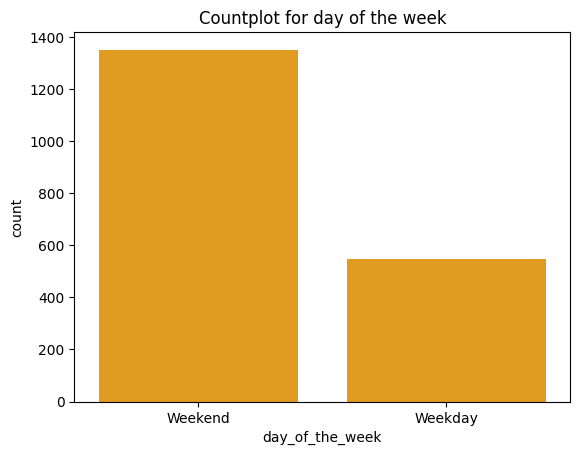

In [32]:
plt.title('Countplot for day of the week')
sns.countplot(data=df,x='day_of_the_week',color='orange');

**Observation:** There are more no orders placed on the weekend

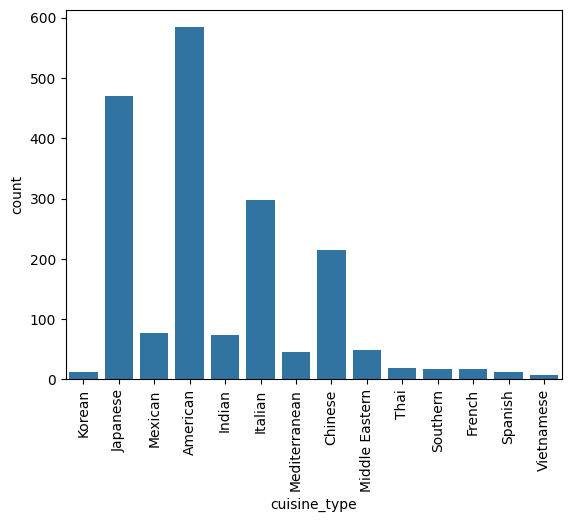

In [33]:
sns.countplot(data=df,x='cuisine_type');
plt.xticks(rotation=90);
plt.show()

**Observation:** The most ordered cuisine was American cuisine and the least ordered was Vietnamese

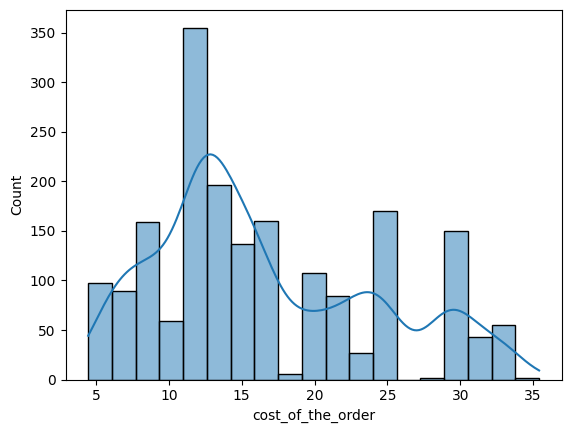

In [34]:
sns.histplot(data=df,x='cost_of_the_order',kde=True);
plt.show()

**Observation:**
- There were more no of orders placed in the cost range between 11 to 14 dollars.
- There are no outliers in the cost of order

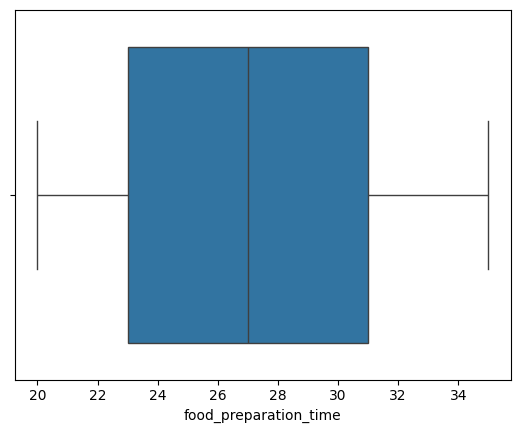

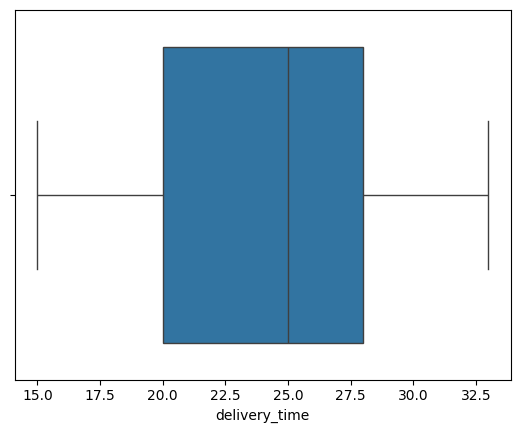

In [35]:
sns.boxplot(data=df,x='food_preparation_time');
plt.show()
sns.boxplot(data=df,x='delivery_time');
plt.show()

**Observation:** There were no outliers in the delivery time and food preperation time.

 ***Approach 1***: Original data with rating 'Not given' in the rating column

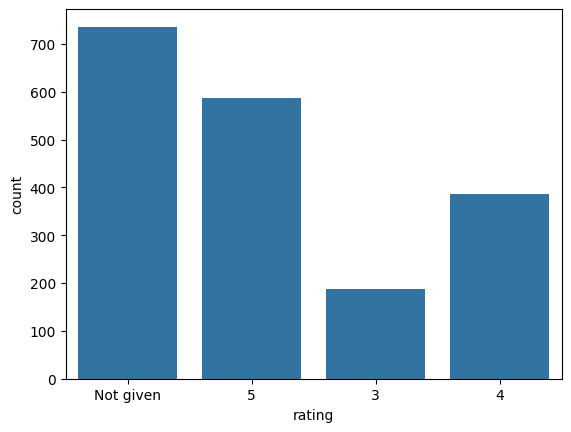

In [36]:
sns.countplot(data=df_original,x='rating');
plt.show()

**Observation:** Among the ratings 3,4,5 and Not given, rating has not been given for more no of orders when compared to 3,4 and 5.

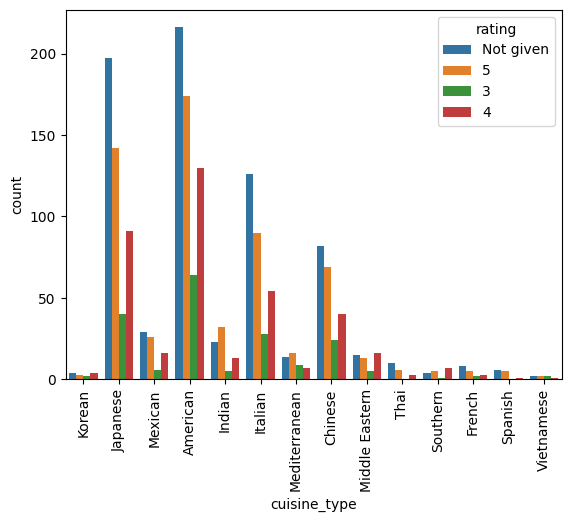

In [37]:
sns.countplot(data=df_original,x='cuisine_type',hue='rating');
plt.xticks(rotation=90);

**Observation:** Rating was not given for all the cuisine types, there is no specific cusine type where the rating was not given. All the cuisines have all the types of rating so rating is not based on cuisine type

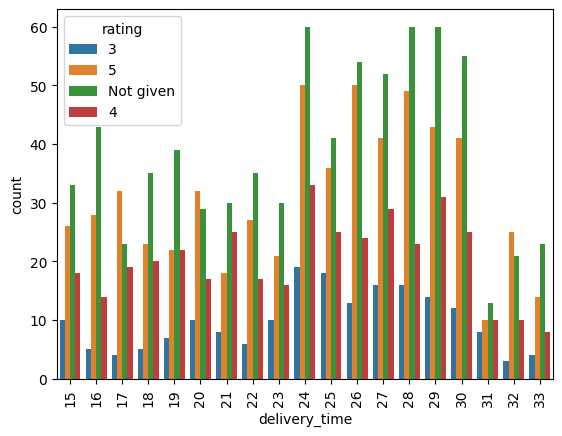

In [38]:
sns.countplot(data=df_original,x='delivery_time',hue='rating');
plt.xticks(rotation=90);

**Observation:** Rating was not given irrespective of food delivery time

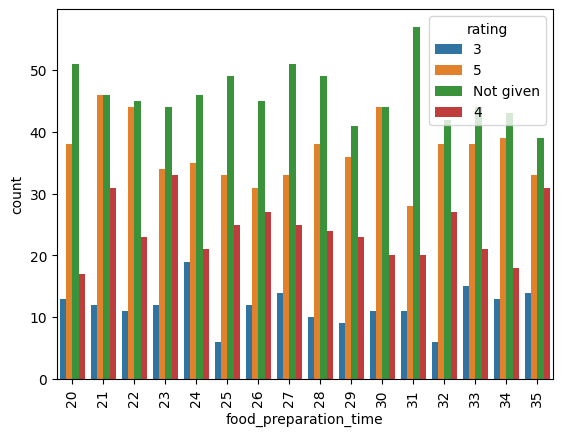

In [39]:
sns.countplot(data=df_original,x='food_preparation_time',hue='rating');
plt.xticks(rotation=90);

**Observation:** Rating was not given irrespective of food_preparation_time

#### ***Approach 2***: Analysis with the imputed data in the rating column

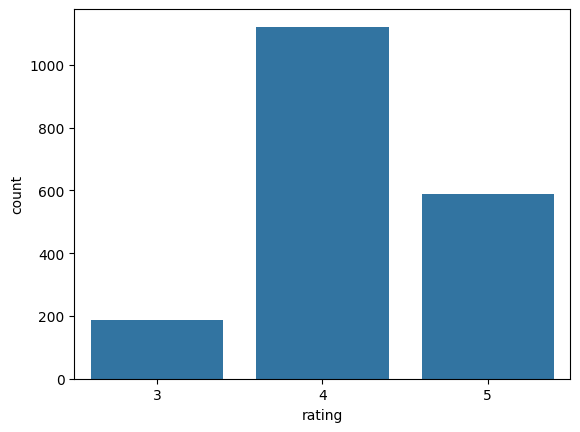

In [40]:
sns.countplot(data=df,x='rating');
plt.show()

**Observation:** After imputing the rating column with mean value, rating value 4 have more no of ratings when compared to 3 and 5.

#### Observations:
- More no of orders were placed on weekends compared to weekdays
- The most ordered cuisine is American cuisine
- The least ordered cusine is Vietnamese
- There are no outliers in the cost of the orders, Food preperation time and Delivery time
- There is a big variation in the analysis of rating column between the 2 approaches(with and without imputing)
- With original data more no of orders were rated 5, with imputed data more no of were rated 4.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [41]:
# Finding top 5 reataurants in terms of number of orders received

df_rest_name=df.groupby('restaurant_name')['order_id'].count().reset_index().rename(columns={'index':'restaurant_name','order_id':'count'})
df_rest_name=pd.DataFrame(df_rest_name)
df_rest_name.sort_values(by='count',ascending=False)



,restaurant_name,count
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119
20,Blue Ribbon Fried Chicken,96
109,Parm,68
...,...,...
85,Klong,1
83,Kambi Ramen House,1
77,Il Bambino,1
76,Hunan Manor,1


#### Observations:
- Shake Shack,The Meatball Shop,Blue Ribbon Sush, Blue Ribbon Fried Chicken and Parm are the top 5 restaurants in terms of no of orders received


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

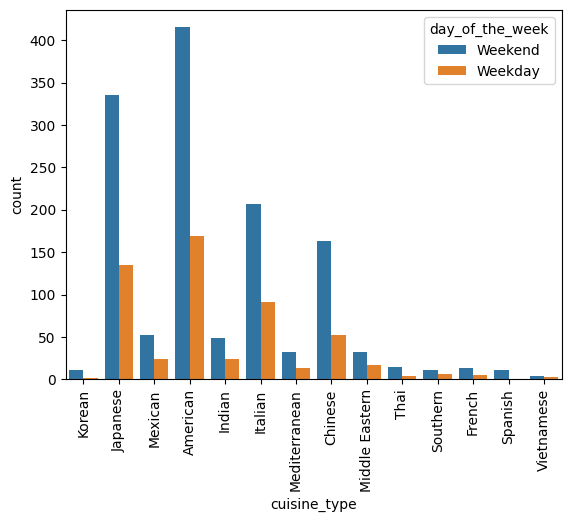

In [42]:
sns.countplot(data=df,x='cuisine_type',hue='day_of_the_week');
plt.xticks(rotation=90);

In [43]:
# Write the code here

df.groupby(['day_of_the_week','cuisine_type']).count()



order_id  customer_id  restaurant_name  \
day_of_the_week cuisine_type                                             
Weekday         American             169          169              169   
                Chinese               52           52               52   
                French                 5            5                5   
                Indian                24           24               24   
                Italian               91           91               91   
                Japanese             135          135              135   
                Korean                 2            2                2   
                Mediterranean         14           14               14   
                Mexican               24           24               24   
                Middle Eastern        17           17               17   
                Southern               6            6                6   
                Spanish                1            1                1   
                Thai                   4            4                4   
                Vietnamese             3            3                3   
Weekend         American             415          415              415   
                Chinese              163          163              163   
                French                13           13               13   
                Indian                49           49               49   
                Italian              207          207              207   
                Japanese             335          335              335   
                Korean                11           11               11   
                Mediterranean         32           32               32   
                Mexican               53           53               53   
                Middle Eastern        32           32               32   
                Southern              11           11               11   
                Spanish               11           11               11   
                Thai                  15           15               15   
                Vietnamese             4            4                4   

                                cost_of_the_order  rating  \
day_of_the_week cuisine_type                                
Weekday         American                      169     169   
                Chinese                        52      52   
                French                          5       5   
                Indian                         24      24   
                Italian                        91      91   
                Japanese                      135     135   
                Korean                          2       2   
                Mediterranean                  14      14   
                Mexican                        24      24   
                Middle Eastern                 17      17   
                Southern                        6       6   
                Spanish                         1       1   
                Thai                            4       4   
                Vietnamese                      3       3   
Weekend         American                      415     415   
                Chinese                       163     163   
                French                         13      13   
                Indian                         49      49   
                Italian                       207     207   
                Japanese                      335     335   
                Korean                         11      11   
                Mediterranean                  32      32   
                Mexican                        53      53   
                Middle Eastern                 32      32   
                Southern                       11      11   
                Spanish                        11      11   
                Thai                           15      15   
                Vietnamese                

#### Observations:
- 415 orders were placed in American cuisine over the weekends which shows that American cuisine is the most popular cuisine on the weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [44]:

((df.loc[df['cost_of_the_order']>20]).shape[0]*100)/df.shape[0]



29.24130663856691

### **Question 10**: What is the mean order delivery time? [1 mark]

In [45]:
# Write the code here

df['delivery_time'].mean()

24.161749209694417

#### Observations:
- The mean order delivery time is 24.16 mins


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [46]:
# Write the code here
df['customer_id'].value_counts()




52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations:
- Top 3 most frequent customers are 52832,47440,83287
- No of orders for each customer
  - 52832 - 13 orders
  - 47440 - 10 orders
  - 83287 - 9 orders



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [47]:
# Write the code here
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


- Numerical data
  - cost_of_the_order
  - rating
  - food_preparation_time
  - delivery_time

- Categorical data
  - restaurant_name
  - cuisine_type
  - day_of_the_week

**Approach1:** Analysis with imputed dataset

<ipython-input-48-5235dc238746>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);


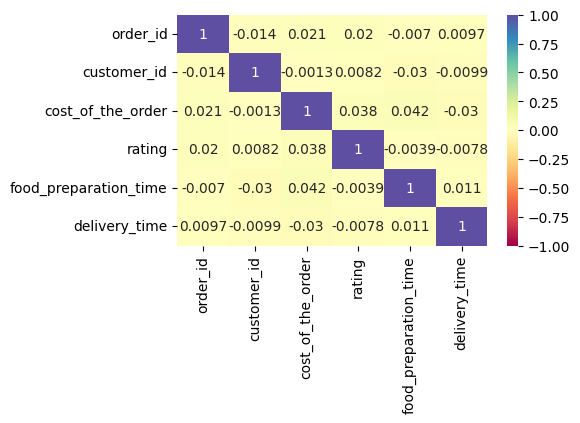

In [48]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);
plt.show();

**Observations**:

- Rating has negative correlation with delivery time and food preperation time. This indicates that as the food delivery and preparation time increases the rating goes down or there could not be any relationship between rating, food delivery and preperation time

- Food preperation time and delivery time is positively correleated which indicates as the food preperation time increases the delivery time increases or there could not be any relationship between them.

- Lets analyse and understand the relationship between rating, food preparation time and delivery time


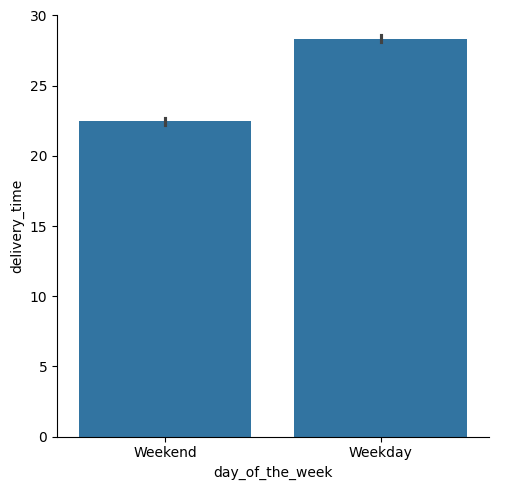

In [49]:
sns.catplot(x='day_of_the_week', y='delivery_time', data=df, kind="bar")
plt.show()

#### **Relationship between food preperation time and day of the week**

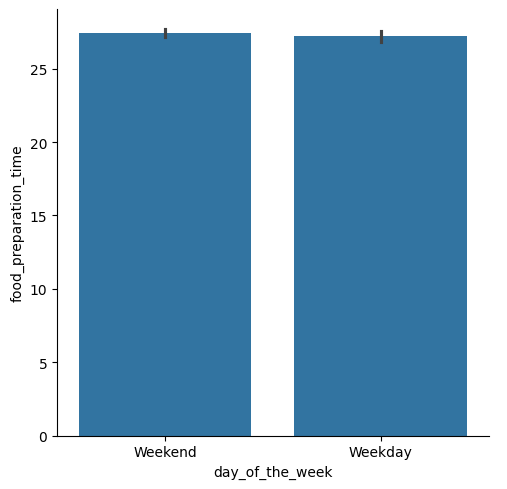

In [50]:
sns.catplot(x='day_of_the_week', y='food_preparation_time', data=df, kind="bar")
plt.show()

#### **Observations**:

- Food preperation time is same on both weekdays and weekends. This indicates that the day of the week does not affect the food preperation time

#### **Relationship between delivery time and day of the week**

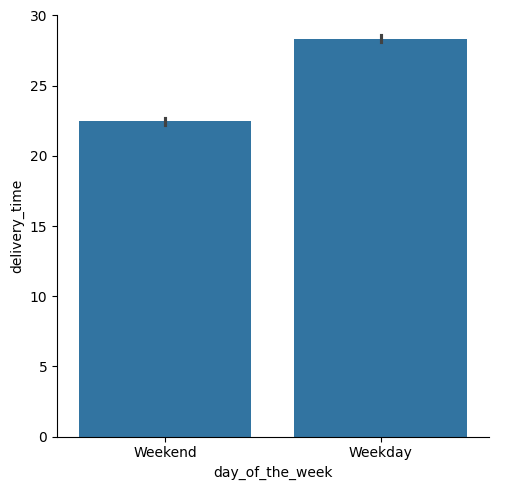

In [51]:
sns.catplot(x='day_of_the_week', y='delivery_time', data=df, kind="bar")
plt.show()

#### **Observations**:

- Food delivery time is more on weekdays when compared to weekends. Due to work and tight schedule there might be more food orders on the weekdays
- Increase in the no of orders may increase the delivery time or there might be less no of delivery person on the weekdays when compared to weekends


#### **Relationship between rating and day of the week**

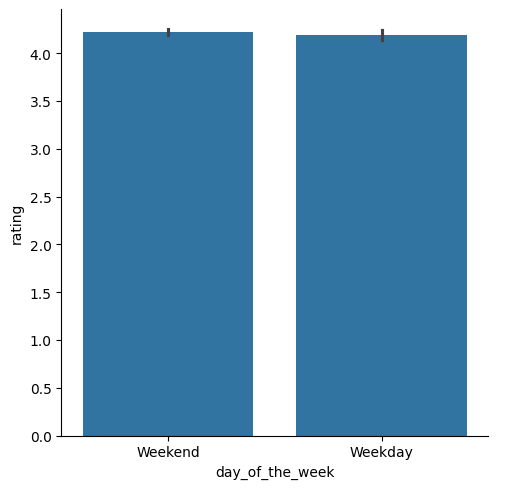

In [52]:
sns.catplot(x='day_of_the_week', y='rating', data=df, kind="bar")
plt.show()

#### **Observations**:
- Rating doesnt have impact by the day of the week

#### **Relationship between rating and delivery time and cost of the order**

<ipython-input-53-809d78a7f0c6>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x="delivery_time", y="rating", ci=False, color="red")


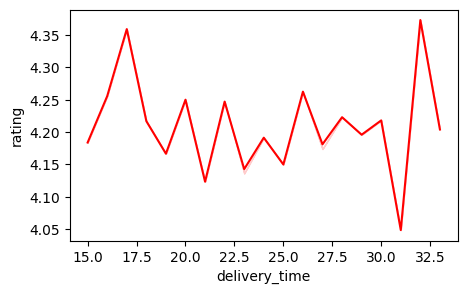

In [53]:
plt.figure(figsize=(5,3))
sns.lineplot(data=df, x="delivery_time", y="rating", ci=False, color="red")
plt.show()

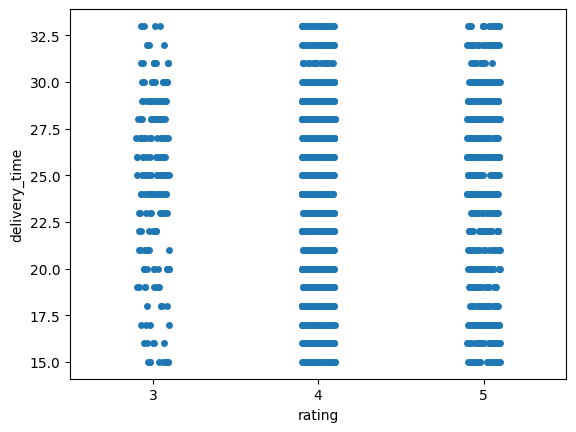

In [54]:
sns.stripplot(data=df,y="delivery_time", x="rating",jitter=True);

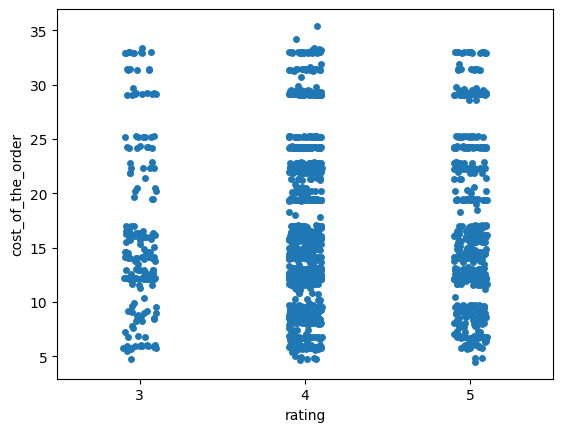

In [55]:
sns.stripplot(data=df,y="cost_of_the_order", x="rating",jitter=True);

#### **Observation**:
- Rating is equally distributed across the delivery time and the cost of order, this indicates that rating does not have relationship with both delivery time and cost of order

**Approach2:**Analysis with original dataset

In [56]:
df_original.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


**Creating 2 df one with valid rating and other one with Not given rating **

In [57]:
df_ori_val_rat = df_original.loc[df_original['rating']!='Not given']
df_ori_val_rat['rating'] = df_ori_val_rat['rating'].astype(int)
df_ori_val_rat.head()



<ipython-input-57-30757f974228>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ori_val_rat['rating'] = df_ori_val_rat['rating'].astype(int)


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


In [58]:
df_ori_ng_rat = df_original.loc[df_original['rating']=='Not given']
df_ori_ng_rat.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23,30


<ipython-input-59-7579bb5347d6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ori_val_rat.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);


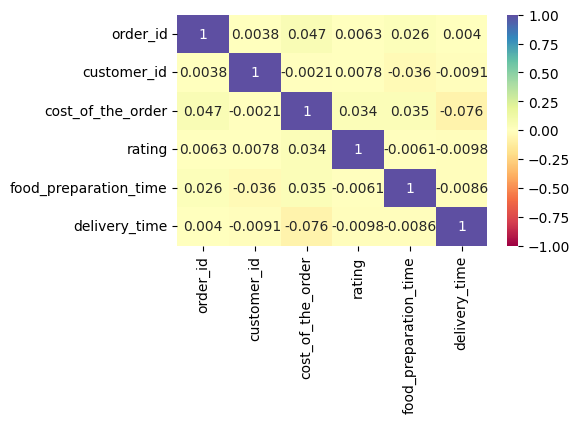

In [59]:
plt.figure(figsize=(5,3))
sns.heatmap(df_ori_val_rat.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);
plt.show();

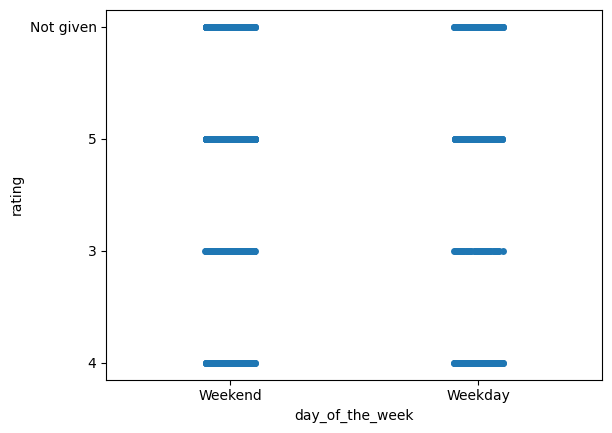

In [60]:
sns.stripplot(data=df_original,x='day_of_the_week',y='rating');

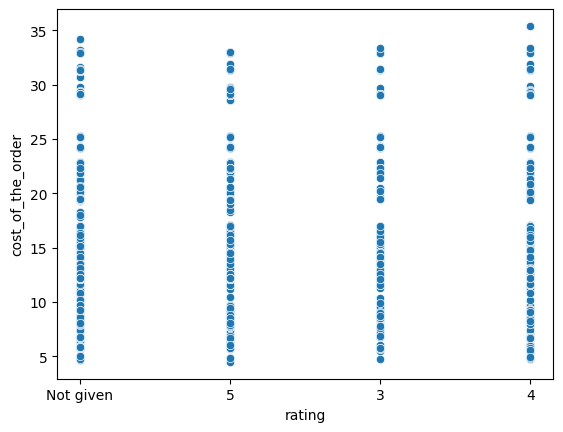

In [61]:
sns.scatterplot(data=df_original,y='cost_of_the_order',x='rating');

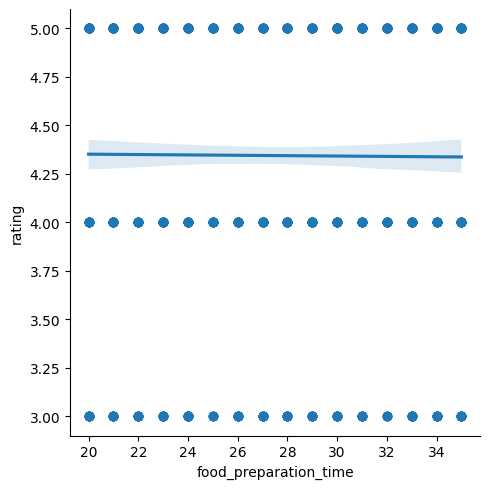

In [62]:
sns.lmplot(data=df_ori_val_rat,y='rating',x='food_preparation_time');

**Observation:**
- Rating was not given for 736 orders.
- Analysed the data with different approaches with imputation and without imputation
- Analysed rating column with cusine type, food preperation time, delivery time, cost of order.
- There is no strong relationship between rating with other columns



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

### **Solution with original data**

In [63]:
df_orig_rating_count=df_original.groupby('restaurant_name')['rating'].count().reset_index().rename(columns={'index':'restaurant_name','rating':'count'})
df_orig_rating_count

,restaurant_name,count
0,'wichcraft,1
1,12 Chairs,4
2,5 Napkin Burger,5
3,67 Burger,1
4,Alidoro,1
...,...,...
173,Zero Otto Nove,2
174,brgr,2
175,da Umberto,3
176,ilili Restaurant,18


In [64]:
df_orig_rating_mean=df_ori_val_rat.groupby('restaurant_name')['rating'].mean().reset_index().rename(columns={'index':'restaurant_name','rating':'mean'})
df_orig_rating_mean

,restaurant_name,mean
0,'wichcraft,5.000000
1,12 Chairs,4.500000
2,5 Napkin Burger,4.000000
3,67 Burger,5.000000
4,Amma,4.500000
...,...,...
151,Zero Otto Nove,4.000000
152,brgr,3.000000
153,da Umberto,5.000000
154,ilili Restaurant,4.153846


In [65]:
df_orig_concat=pd.concat([df_orig_rating_count,df_orig_rating_mean],axis=1)

df_concat_orig_temp=pd.DataFrame(df_orig_concat)

df_orig_restaurant_list=df_concat_orig_temp.loc[(df_concat_orig_temp['count']>50) & (df_concat_orig_temp['mean']>4)]

df_orig_restaurant_list


,restaurant_name,count,restaurant_name,mean
20,Blue Ribbon Fried Chicken,96,Boqueria,4.750000
21,Blue Ribbon Sushi,119,Bubby's,4.500000
109,Parm,68,Samurai Mama,5.000000
121,RedFarm Broadway,59,Sushi Samba,4.875000
122,RedFarm Hudson,55,Sushi of Gari,4.714286
136,Shake Shack,219,Tortaria,5.000000
153,The Meatball Shop,132,da Umberto,5.000000


#### Observations:

- There are total 7 restaurants eligible for the promotional offer whose satisfies the critirea of no of ratings more than 50 and the average rating more than 4.
- The eligible restaurant list is available in the dataframe df_orig_restaurant_list


### **Solution with imputed data**

In [66]:
df_rating_count=df.groupby('restaurant_name')['rating'].count().reset_index().rename(columns={'index':'restaurant_name','rating':'count'})
df_rating_count

,restaurant_name,count
0,'wichcraft,1
1,12 Chairs,4
2,5 Napkin Burger,5
3,67 Burger,1
4,Alidoro,1
...,...,...
173,Zero Otto Nove,2
174,brgr,2
175,da Umberto,3
176,ilili Restaurant,18


In [67]:
df_rating_mean=df.groupby('restaurant_name')['rating'].mean().reset_index().rename(columns={'index':'restaurant_name','rating':'mean'})
df_rating_mean

,restaurant_name,mean
0,'wichcraft,5.000000
1,12 Chairs,4.250000
2,5 Napkin Burger,4.000000
3,67 Burger,5.000000
4,Alidoro,4.000000
...,...,...
173,Zero Otto Nove,4.000000
174,brgr,3.500000
175,da Umberto,4.333333
176,ilili Restaurant,4.111111


In [68]:
df_concat=pd.concat([df_rating_count,df_rating_mean],axis=1)

df_concat_temp=pd.DataFrame(df_concat)

df_restaurant_list=df_concat_temp.loc[(df_concat_temp['count']>50) & (df_concat_temp['mean']>4)]

df_restaurant_list


,restaurant_name,count,restaurant_name,mean
20,Blue Ribbon Fried Chicken,96,Blue Ribbon Fried Chicken,4.218750
21,Blue Ribbon Sushi,119,Blue Ribbon Sushi,4.134454
109,Parm,68,Parm,4.073529
121,RedFarm Broadway,59,RedFarm Broadway,4.169492
122,RedFarm Hudson,55,RedFarm Hudson,4.109091
136,Shake Shack,219,Shake Shack,4.168950
153,The Meatball Shop,132,The Meatball Shop,4.325758


#### Observations:

- There are total 7 restaurants eligible for the promotional offer whose satisfies the critirea of no of ratings more than 50 and the average rating more than 4.
- The eligible restaurant list is available in the dataframe df_restaurant_list


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [69]:
# Write the code here
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [70]:
def profit(p):
  if p > 20:
    p = (p*1.25) - p
  elif p > 5 and p <=20:
    p = (p*1.15) - p
  return p


df['comp_profit'] = df['cost_of_the_order'].apply(profit)
df.head()



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,comp_profit
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [71]:
df['comp_profit'].sum()

6209.042999999999

#### Observations:

- The net profit of the company across all the orders is $6209.04


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [72]:
# Write the code here
#create new column with total time(prep and delivery time )
#find the sum of total time where time > 60 and use normalize=True to get the percentage

df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,comp_profit,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [73]:
((df['total_time']>60).sum()*100)/df.shape[0]

10.53740779768177

#### **Observations**:

- 10.5% of orders took more than 60 minutes of total time including food preperation time and delivery time

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

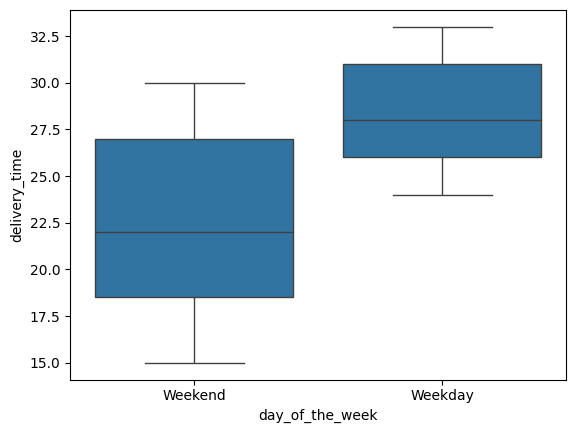

In [74]:
# Write the code here

sns.boxplot(data=df,x='day_of_the_week',y='delivery_time');

#### Observations:

- The mean delivery time is more on weekdays when compared to weekends



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- More number of orders were placed on weekends when compared to weekdays
- Most frequently ordered cuisine was American cousine and the least is Vietnamese
- Most popular cuisine on the weekends was American cuisine
- All the cuisines have mixed rating.
- There are no ratings of 1 or 2, rating ranges from 3 to 5 and there were 736 orders for which the rating was not given
- Each and every cuisine has all the four ratings 3,4,5 and Not given
- Rating doesn't seems to have relationship with the cusine type, food preperation tine and delivery time or cost of order
- Rating was given 3 for orders with less delivery time or foode preperation time or cost of order and high rating of 5 has been give to orders with high delivery time, food pereparation time and for orders with high cost
- Rating was Not given for 736 orders across all the cuisine types, irrespective of the food preperation time, food delivery time and the cost of order
- There are no specific cuisine type or restaurant with rating Not given
- Customers might have not given rating various the below reasons
   - Most common reason could be most of the customers dont have a habbit of giving ratings
   - Sometimes could be because customers dont like something in the order like the taste or quality of the food or total delivery time. But here in this dataset there seems to be no specific reason
- Since the most rated and most popular cusine was American cuisine, more number of orders were placed for that csuisine and more nunber of ratings were given for the same



### Recommendations:

- To increase the no of orders in the weekdays, we can suggest to give come back promotional offer for the weekday orders. Food hub can send an email or text message with discount code to be used for the orders in weekdays with validity with start and end date to the customers who placed orders on the weekend.
- During weekdays Food hub can bring subscription plans for working people especially in the special shifts for whom cooking everyday might be a big challenge.
- Rating was not given for almost 40% of the orders in the dataset, with this missing no of ratings its quit hard to analyse and do the predictions.
- To encourage customers to rate the orders food hub can give reward points for each rating and after accumulating certain amount of points customers can redeem the rewards and get the discount for their future orders.
- Also we can add a new column with custromer feedback. The feedbacks can be given with some predefined options for the customers to pick.
- For the ratings 3 to 5, we can ask about the food, about the service(total time of the food delivery)
- For ratings 1 to 2, we can ask for areas of improvement on how we can do better and gve better service

---